# Intro



We learned about RNN and LSTM in our class, which can be used to process time series data. These models can also be applied to NLP tasks. Among the various models available for NLP, BERT is one of the most famous ones. In November 2018, Google introduced BERT (Bidirectional Encoder Representations from Transformers), an AI language model that gained attention in the field of NLP deep learning models by achieving higher accuracy than humans in some performance evaluations.

NLP research labs and companies often evaluate the performance of their models using the SQuAD dataset. SQuAD stands for Stanford Question Answering Dataset and it is a test set created by Stanford University using datasets such as Wikipedia. BERT has shown impressive scores on the SQuAD test set since late 2018, further increasing its prominence.

The purpose of this project is to enable BERT to solve fill-in-the-blank inference problems from the Korean national college entrance exam (수능) English section. Since there is a limited amount of training data specifically for 수능 fill-in-the-blank inference, we will utilize the TOEIC dataset for training and then apply the trained model to solve 수능 problems.

# BERT
BERT stands for Bidirectional Encoder Representations from Transformers. It is a state-of-the-art machine learning model developed by Google for natural language processing tasks. BERT is designed to understand the context of words in a sentence by looking at the words that come before and after it, which is why it's called "bidirectional."

Here's a simplified explanation of how BERT works:

**Input Embedding: **BERT takes a sentence as input. The sentence is broken down into tokens (words or parts of words). Each token is then converted into a numerical representation (an embedding) that can be understood by the model.

**Self-Attention Mechanism**: BERT uses a mechanism called self-attention. This allows the model to weigh the importance of each word in the sentence when trying to understand the meaning of a particular word. For example, in the sentence "He picked up the glass and drank from it," the word "it" is heavily influenced by the word "glass."

**Encoder Layers**: The processed embeddings then pass through a series of Transformer encoder layers. Each layer further refines the understanding of the sentence.

**Output**: The final embeddings are used for whatever task BERT is being used for. For example, in a question-answering task, BERT would use the final embeddings to determine the most likely answer to a given question.

One of the key advantages of BERT is that it can be fine-tuned for a wide variety of NLP tasks with a relatively small amount of training data, making it a very versatile and powerful model.

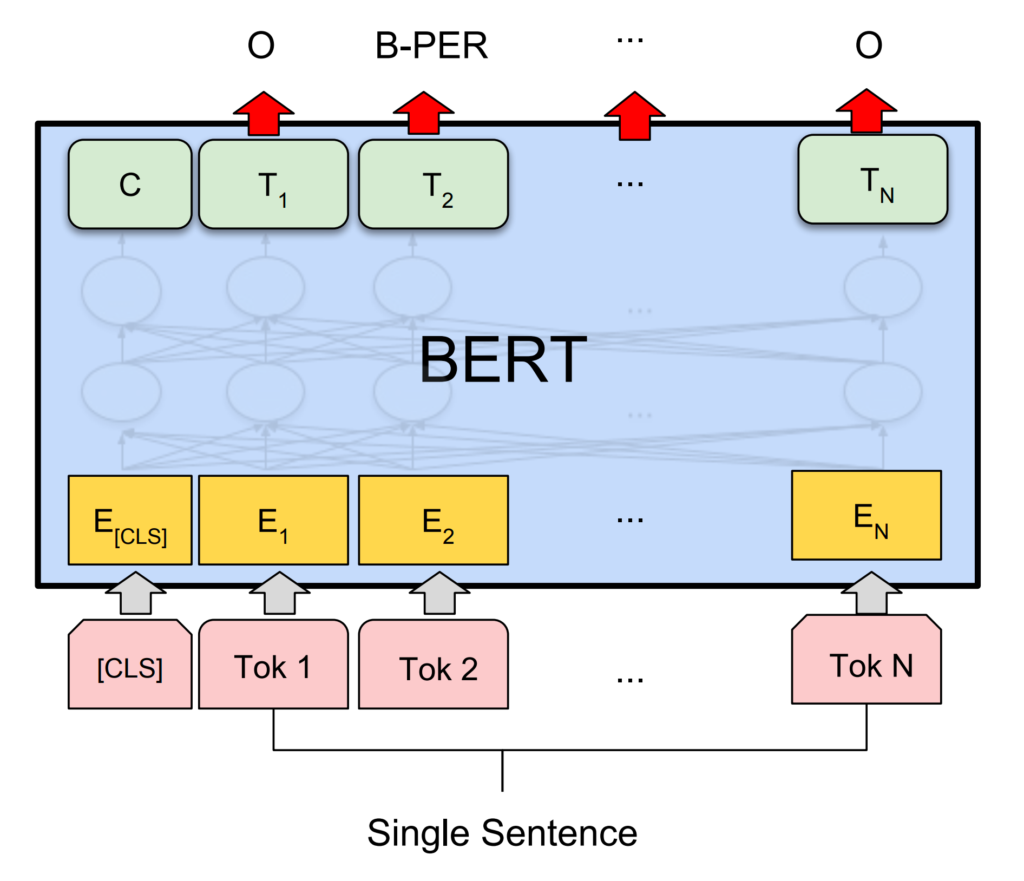

# Get Pre-trained model
I will be using the Python library called transformers. Transformers is a Python library that provides various modules for natural language processing, allowing for effective utilization. It includes implementations of leading language models such as BERT and can be used for various NLP tasks such as text classification, named entity recognition, and sentence generation.

By using the transformers library, you can easily load pre-trained language models and perform tasks such as sentence tokenization, embedding, and output classification. Additionally, it allows for fine-tuning the language model to tailor it to specific tasks and train it accordingly.

Transformers provides a convenient interface for a range of NLP tasks and offers a variety of pre-trained model options, making it easier to perform natural language processing tasks.

We can choose the different BERT model depending on the task. These are some examples.
1. BertForQuestionAnswering
2. BertForTokenClassification
3. BertForMaskedLM
4. BertForMultipleChoice


In [ ]:
!pip install transformers
!pip install torchsummary torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=c25bcf34d8271b76e4262fb32c80ee28a97c1a5755e35320920db432ace8b52c
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import json

import os

In [ ]:
!git clone https://github.com/choisw0823/CS376.git

Cloning into 'CS376'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), 310.98 KiB | 2.88 MiB/s, done.


In [ ]:
os.listdir('CS376')

['README.md', '.git', 'sat_train.csv', 'train.json']

# Training without TOEIC
First, I will proceed with training using only the Korean national college entrance exam  English dataset.

# SAT Dataset


I will proceed to train the model on complex problems from the Korean national college entrance exam
The problems are in the format of fill-in-the-blank inference, similar to the previous TOEIC questions. All the files that were originally in HWP file format, as shown in the following image, have been converted into CSV format. <br>

The dataset contains fill-in-the-blank questions taken from exams for the first to third year of high school.The Blank in the question is represented with "___".

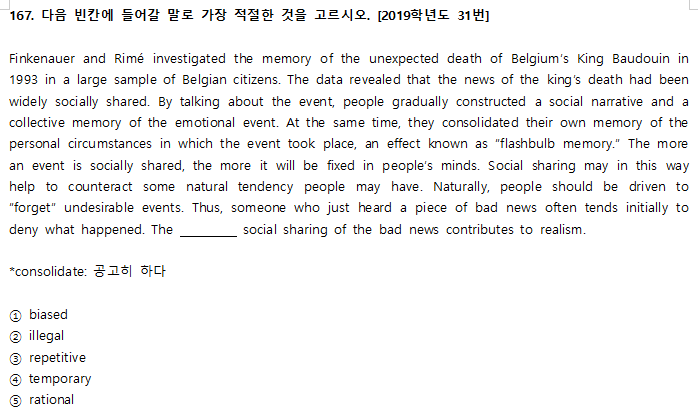

In [ ]:
# Load the data from CSV file
sat_data =pd.read_csv('CS376/sat_train.csv', encoding='ISO-8859-1')


sat_data.shape


(155, 3)

In [ ]:
rows_with_nan = sat_data[sat_data.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [question, option, answer]
Index: []


In [ ]:
sat_data.head

<bound method NDFrame.head of                                               question  \
0    Languages evolve differences because different...   
1    Our craving for ___ is illustrated by a study ...   
2    Feedback is usually most effective when you of...   
3    Think of how you developed your style of using...   
4    Feedback is usually most effective when you of...   
..                                                 ...   
150  The idea that artists have a unique message to...   
151  If we can't have everything we want today, wha...   
152  Once a hand or gripper has been directed to an...   
153  A sleeping mother has the ability to identify ...   
154  ¡°What¡¯s in a name? That which we call a rose...   

                                                option  \
0    artistic taste, group identity, intellectual p...   
1    knowledge of the future, relief from feeling h...   
2         For example, In addition, Similarly, So, But   
3    the ability to control emotions, the

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sat_data, test_size=0.2, random_state=42)
print('train_data : ', len(train_data), ' test_data : ', len(test_data))

train_data :  124  test_data :  31


# Training
## Bert model selection
Now we will load the pretrained-model. The model is BertForMultipleChoice.
![image.png](https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fwikidocs.net%2Fimages%2Fpage%2F35594%2Fbartbase%25EC%2599%2580large.PNG&blockId=7b607dd2-9f3a-4d01-ad14-39eadb3746e1)
The basic structure of BERT is a stack of encoders based on the Transformer architecture. <br>
L: Number of encoder layers <br>
A: Number of attention heads <br>
H: Size of hidden units <br>

BERT-Base: L=12, D=768, A=12, with 110 million parameters <br>
BERT-Large: L=24, D=1024, A=16, with 340 million parameters <br>
BERT-Tiny: L=2, A=2, H=128 <br>
BERT-Mini: L=4, A=4, H=256 <br>
BERT-Small: L=4, A=8, H=521 <br>
BERT-Medium: L=8, A=8, H=521 <br>

In BERT, the terms "cased" and "uncased" refer to how the model handles the casing of input text. <br>

In the "cased" model, the original casing of the input text is preserved. For example, "Apple" and "apple" would be treated as distinct tokens. <br>

In the "uncased" model, all the input text is converted to lowercase. Therefore, "Apple" and "apple" would be treated as the same token. <br>

In this project, I will use bert-large-cased model <br>
## Tokenizer
In BERT, a tokenizer is responsible for breaking down input text into individual tokens, which are the smallest units of meaning in the language. The tokenizer plays a crucial role in the preprocessing step of BERT, as it segments the input text and converts it into a format that can be understood by the model.

The tokenizer in BERT performs several important tasks:

Tokenization: It splits the input text into tokens. This process involves handling punctuation, splitting words, and addressing special cases such as contractions and compound words.

Vocabulary Mapping: The tokenizer maps each token to its corresponding index in the BERT vocabulary. Each token is assigned a unique numerical representation that the model can understand.

Special Tokens: The tokenizer adds special tokens to mark the beginning and end of sentences, as well as to indicate padding and unknown words.

Token Encoding: The tokenizer encodes the tokens into numerical representations, such as their respective indices or embeddings, which can be inputted into the BERT model.

Overall, the tokenizer in BERT is a crucial component that enables the model to understand and process textual input effectively.
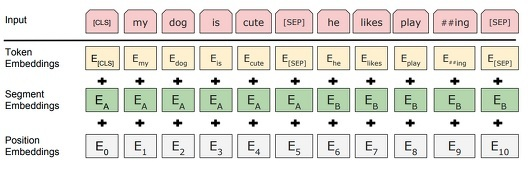![image.png](https://postfiles.pstatic.net/MjAyMTA0MDZfNzIg/MDAxNjE3NzIxMDU5NTgw.asUP1M4nO-fR-HSx42C5Z1oo4PEd23kVEcKxH5oYuzEg.XFXVs1dKnpdW0A-WDbKOOfn8O8rKE0JIY9hzmmz8rKIg.PNG.handuelly/image.png?type=w773)

In [ ]:
from transformers import BertTokenizer, BertForMultipleChoice, AdamW

#Load pre-trained model and tokenizer
model = BertForMultipleChoice.from_pretrained('bert-large-cased')
tokenizer = BertTokenizer.from_pretrained('bert-large-cased')

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForMultipleChoice: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-large-cased and are newly initialized: ['classifier.bias', 'c

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
device

device(type='cuda')

In [ ]:
context = sat_data["question"][0]
options = sat_data["option"][0]
correct_option = sat_data["answer"][0].strip()

# Prepare the inputs
choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=128, padding='max_length', truncation=True) for option in options]
choices_inputs

[{'input_ids': tensor([[  101, 18388, 23530,  5408,  1272,  1472,  2114,  1104,  1234,  8942,
           3689,  1472,  1734,  1105,  1472, 17238,  1116,  1166,  1103,  1736,
           1104,  1159,   119,  1252,  1103,  2304,  2606,  1725,  1343, 23448,
           3660,  3483,  1274,   200,   100, 14713,  1254,  1165,  3147,  4757,
           1234,  2819,  1149,  1105,  1231,   118,  3232,  1296,  1168,  1120,
           4055,  7070,   119,  1370,  5374,   117,  1120,  1103,  2030,  5904,
           1206,  1860,  1105,  2870,   117,  1175,  1132,  3129,  4024,  1485,
           1528,  4024,   117,  1133,  1103, 12453,  1253,  2936,   170,  1469,
           2783,  1104,  1719,  1528,  1137,  1104,  3129,   117,  1897,  1190,
            170,  5495,  1104,  1528,  1105,  3129,   119,  2009,  1110,  1115,
           1177,   136, 10109,  1103,  1514, 22611,  1104,  3522,   170,  3216,
           1846,  6808,   170,  3501,  3053,  1104,  1769,  1846,   131,  1112,
           1770,  1112,  1

First, I will evaluate test set and check the accuracy.

In [ ]:
# Set the model to evaluation mode
model.eval()

# Evaluation loop
num_correct = 0
for idx, row in test_data.iterrows():
    context = row["question"]
    options = row["option"].split(',')  # Assumes options are comma-separated in the CSV
    options = [option.strip() for option in options]
    correct_option = row["answer"].strip()

    # Prepare the inputs
    choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=256, padding='max_length', truncation=True) for option in options]

    # Get the input tensors and reshape them
    input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    # Compute the model outputs
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)


    # Get the predicted option
    predicted_option = torch.argmax(outputs.logits).item()

    # Check if the prediction is correct
    if predicted_option == options.index(correct_option):
        num_correct += 1
    print(f"Question {idx + 1} / {len(test_data)}")

Question 82 / 31
Question 143 / 31
Question 32 / 31
Question 30 / 31
Question 119 / 31
Question 61 / 31
Question 94 / 31
Question 148 / 31
Question 154 / 31
Question 69 / 31
Question 43 / 31
Question 139 / 31
Question 79 / 31
Question 76 / 31
Question 16 / 31
Question 20 / 31
Question 31 / 31
Question 91 / 31
Question 118 / 31
Question 138 / 31
Question 19 / 31
Question 13 / 31
Question 10 / 31
Question 25 / 31
Question 70 / 31
Question 132 / 31
Question 96 / 31
Question 46 / 31
Question 87 / 31
Question 85 / 31
Question 127 / 31


In [ ]:
print(f'Accuracy: {num_correct / len(test_data)}')

Accuracy: 0.0967741935483871


Training for the train set

In [ ]:
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Set the model to training mode
model.train()

num_epochs = 3
# Training loop
for epoch in range(num_epochs):
  for idx, row in train_data.iterrows():
      print(f"Training Question {idx + 1} / {len(train_data)} for epoch {epoch}")
      context = row["question"]
      options = row["option"].split(',')  # Assumes options are comma-separated in the CSV
      options = [option.strip() for option in options]
      #print(row['answer'])
      correct_option = row["answer"].strip()

      # Prepare the inputs
      choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=256, padding='max_length', truncation=True) for option in options]

      # Get the input tensors and reshape them
      input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
      attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)

      # Compute the model outputs
      correct_option_idx = options.index(correct_option)
      correct_option_idx = torch.tensor([correct_option_idx]).to(device)

      outputs = model(input_ids, attention_mask=attention_mask, labels=correct_option_idx)
      # Compute the loss
      loss = outputs.loss

      # Backward pass and optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()



Training Question 97 / 124 for epoch 0


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Question 123 / 124 for epoch 0
Training Question 83 / 124 for epoch 0
Training Question 110 / 124 for epoch 0
Training Question 66 / 124 for epoch 0
Training Question 52 / 124 for epoch 0
Training Question 27 / 124 for epoch 0
Training Question 134 / 124 for epoch 0
Training Question 77 / 124 for epoch 0
Training Question 57 / 124 for epoch 0
Training Question 37 / 124 for epoch 0
Training Question 125 / 124 for epoch 0
Training Question 23 / 124 for epoch 0
Training Question 56 / 124 for epoch 0
Training Question 86 / 124 for epoch 0
Training Question 12 / 124 for epoch 0
Training Question 142 / 124 for epoch 0
Training Question 67 / 124 for epoch 0
Training Question 120 / 124 for epoch 0
Training Question 28 / 124 for epoch 0
Training Question 80 / 124 for epoch 0
Training Question 145 / 124 for epoch 0
Training Question 42 / 124 for epoch 0
Training Question 5 / 124 for epoch 0
Training Question 33 / 124 for epoch 0
Training Question 135 / 124 for epoch 0
Training Question 

Now check the accuracy for the test set after training.

In [ ]:
# Evaluation loop
num_correct = 0
for idx, row in test_data.iterrows():
    context = row["question"]
    options = row["option"].split(',')  # Assumes options are comma-separated in the CSV
    options = [option.strip() for option in options]
    correct_option = row["answer"].strip()

    # Prepare the inputs
    choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=256, padding='max_length', truncation=True) for option in options]

    # Get the input tensors and reshape them
    input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    # Compute the model outputs
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get the predicted option
    predicted_option = torch.argmax(outputs.logits).item()

    # Check if the prediction is correct
    if predicted_option == options.index(correct_option):
        num_correct += 1
    print(f"Question {idx + 1} / {len(test_data)}")

Question 82 / 31
Question 143 / 31
Question 32 / 31
Question 30 / 31
Question 119 / 31
Question 61 / 31
Question 94 / 31
Question 148 / 31
Question 154 / 31
Question 69 / 31
Question 43 / 31
Question 139 / 31
Question 79 / 31
Question 76 / 31
Question 16 / 31
Question 20 / 31
Question 31 / 31
Question 91 / 31
Question 118 / 31
Question 138 / 31
Question 19 / 31
Question 13 / 31
Question 10 / 31
Question 25 / 31
Question 70 / 31
Question 132 / 31
Question 96 / 31
Question 46 / 31
Question 87 / 31
Question 85 / 31
Question 127 / 31


In [ ]:
print(f'Accuracy: {num_correct / len(test_data)}')

Accuracy: 0.2903225806451613


It can be observed that the accuracy has improved compared to before training, but it is still significantly low.

# TOEIC Dataset

There are many reasons for the observed results, but one of them could be that the problems are complex while the dataset size is very small. Therefore, this time we will train the model using the simpler fill-in-the-blank inference problems from the TOEIC dataset and then use this trained model to solve the 수능 (Korean national college entrance exam) problems.

The Blank in the question is represented with "___".


In [ ]:
with open('./CS376/train.json', 'r') as f:
    toeic_data = json.load(f)

items_to_print = list(toeic_data.items())[:3]
items_to_print


[('109',
  {'1': 'will be published',
   '2': 'will publish',
   '3': 'are publishing',
   '4': 'publishes',
   'anwser': 'will be published',
   'question': 'The new novel by Steven Kim ___ no later than the 18th of November according to a reliable source.'}),
 ('110',
  {'1': 'exactly',
   '2': 'jointly',
   '3': 'hardly',
   '4': 'consistently',
   'anwser': 'consistently',
   'question': 'As we have had workers who quit after working for a short period of time, we need someone who can work ___ for at least a year.'}),
 ('111',
  {'1': 'attraction',
   '2': 'attractive',
   '3': 'attracted',
   '4': 'attractively',
   'anwser': 'attractive',
   'question': 'While Jason found the proposal from the other company ___ , he ultimately turned it down to keep the relationship with his original partner company.'})]

In [ ]:
data_list = [{'question': v['question'], 'option': [v[str(i)] for i in range(1, 5)], 'answer': v['anwser']} for v in toeic_data.values()]
data_list[:5]

[{'question': 'The new novel by Steven Kim ___ no later than the 18th of November according to a reliable source.',
  'option': ['will be published',
   'will publish',
   'are publishing',
   'publishes'],
  'answer': 'will be published'},
 {'question': 'As we have had workers who quit after working for a short period of time, we need someone who can work ___ for at least a year.',
  'option': ['exactly', 'jointly', 'hardly', 'consistently'],
  'answer': 'consistently'},
 {'question': 'While Jason found the proposal from the other company ___ , he ultimately turned it down to keep the relationship with his original partner company.',
  'option': ['attraction', 'attractive', 'attracted', 'attractively'],
  'answer': 'attractive'},
 {'question': 'Maverick Manufacturers has maintained the highest safety ___ of any company in its industry.',
  'option': ['standards', 'guides', 'documents', 'precautions'],
  'answer': 'standards'},
 {'question': "Peter had to work during my vacation becaus

# Training

Also, I will use bart-large-cased model.

In [ ]:
# Load pre-trained model and tokenizer
model = BertForMultipleChoice.from_pretrained('bert-large-cased')
tokenizer = BertTokenizer.from_pretrained('bert-large-cased')

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForMultipleChoice: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-large-cased and are newly initialized: ['classifier.bias', 'c

In [ ]:
context = data_list[0]["question"]
options = data_list[0]["option"]
correct_option = data_list[0]["answer"].strip()

# Prepare the inputs
choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=128, padding='max_length', truncation=True) for option in options]
choices_inputs

[{'input_ids': tensor([[  101,  1109,  1207,  2281,  1118,  6536,  4246,  1209,  1129,  1502,
           1185,  1224,  1190,  1103,  4186,  1104,  1379,  2452,  1106,   170,
          10682,  2674,   119,   102,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,   

First, we will input the test dataset into the model without fine-tuning and check the accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42)
print('train_data : ', len(train_data), ' test_data : ', len(test_data))

train_data :  2813  test_data :  704


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
device

device(type='cuda')

In [ ]:

# Set the model to evaluation mode
model.eval()

# Evaluation loop
num_correct = 0
for idx, row in enumerate(test_data):
    context = row["question"]
    options = row["option"]
    correct_option = row["answer"].strip()

    # Prepare the inputs
    choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=128, padding='max_length', truncation=True) for option in options]

    # Get the input tensors and reshape them
    input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    # Compute the model outputs
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get the predicted option
    predicted_option = torch.argmax(outputs.logits).item()

    # Check if the prediction is correct
    if predicted_option == options.index(correct_option):
        num_correct += 1
    print(f"Question {idx + 1} / {len(test_data)}")

Question 1 / 704
Question 2 / 704
Question 3 / 704
Question 4 / 704
Question 5 / 704
Question 6 / 704
Question 7 / 704
Question 8 / 704
Question 9 / 704
Question 10 / 704
Question 11 / 704
Question 12 / 704
Question 13 / 704
Question 14 / 704
Question 15 / 704
Question 16 / 704
Question 17 / 704
Question 18 / 704
Question 19 / 704
Question 20 / 704
Question 21 / 704
Question 22 / 704
Question 23 / 704
Question 24 / 704
Question 25 / 704
Question 26 / 704
Question 27 / 704
Question 28 / 704
Question 29 / 704
Question 30 / 704
Question 31 / 704
Question 32 / 704
Question 33 / 704
Question 34 / 704
Question 35 / 704
Question 36 / 704
Question 37 / 704
Question 38 / 704
Question 39 / 704
Question 40 / 704
Question 41 / 704
Question 42 / 704
Question 43 / 704
Question 44 / 704
Question 45 / 704
Question 46 / 704
Question 47 / 704
Question 48 / 704
Question 49 / 704
Question 50 / 704
Question 51 / 704
Question 52 / 704
Question 53 / 704
Question 54 / 704
Question 55 / 704
Question 56 / 704
Q

In [ ]:
print(f'Accuracy: {num_correct / len(test_data)}')

Accuracy: 0.18607954545454544


Now I will train the model by train data set and re-evaluate for test set. <br>
**I only do the training for 1 epoch because of the running-time. If epoch gets larger, then the accuracy will increase further**

In [ ]:
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Set the model to training mode
model.train()

num_epochs = 3
# Training loop
for epoch in range(num_epochs):
  for idx, row in enumerate(train_data):
      context = row["question"]
      options = row["option"]
      correct_option = row["answer"].strip()

      # Prepare the inputs
      choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=256, padding='max_length', truncation=True) for option in options]

      # Get the input tensors and reshape them
      input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
      attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)

      # Compute the model outputs
      correct_option_idx = options.index(correct_option)
      correct_option_idx = torch.tensor([correct_option_idx]).to(device)

      outputs = model(input_ids, attention_mask=attention_mask, labels=correct_option_idx)

      # Compute the loss
      loss = outputs.loss

      # Backward pass and optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      if idx % 50 == 0:
        print(f"Training Question {idx + 1} / {len(train_data)} for epoch {epoch}")

Training Question 1 / 2813 for epoch 0
Training Question 51 / 2813 for epoch 0
Training Question 101 / 2813 for epoch 0
Training Question 151 / 2813 for epoch 0
Training Question 201 / 2813 for epoch 0
Training Question 251 / 2813 for epoch 0
Training Question 301 / 2813 for epoch 0
Training Question 351 / 2813 for epoch 0
Training Question 401 / 2813 for epoch 0
Training Question 451 / 2813 for epoch 0
Training Question 501 / 2813 for epoch 0
Training Question 551 / 2813 for epoch 0
Training Question 601 / 2813 for epoch 0
Training Question 651 / 2813 for epoch 0
Training Question 701 / 2813 for epoch 0
Training Question 751 / 2813 for epoch 0
Training Question 801 / 2813 for epoch 0
Training Question 851 / 2813 for epoch 0
Training Question 901 / 2813 for epoch 0
Training Question 951 / 2813 for epoch 0
Training Question 1001 / 2813 for epoch 0
Training Question 1051 / 2813 for epoch 0
Training Question 1101 / 2813 for epoch 0
Training Question 1151 / 2813 for epoch 0
Training Questi

After training, we will test and see the accuracy

In [ ]:
# Set the model to evaluation mode
model.eval()

# Evaluation loop
num_correct = 0
for idx, row in enumerate(test_data):
    context = row["question"]
    options = row["option"]
    correct_option = row["answer"].strip()

    # Prepare the inputs
    choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=128, padding='max_length', truncation=True) for option in options]

    # Get the input tensors and reshape them
    input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)

    # Compute the model outputs
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get the predicted option
    predicted_option = torch.argmax(outputs.logits).item()

    # Check if the prediction is correct
    if predicted_option == options.index(correct_option):
        num_correct += 1
    print(f"Question {idx + 1} / {len(test_data)}")

Question 1 / 704
Question 2 / 704
Question 3 / 704
Question 4 / 704
Question 5 / 704
Question 6 / 704
Question 7 / 704
Question 8 / 704
Question 9 / 704
Question 10 / 704
Question 11 / 704
Question 12 / 704
Question 13 / 704
Question 14 / 704
Question 15 / 704
Question 16 / 704
Question 17 / 704
Question 18 / 704
Question 19 / 704
Question 20 / 704
Question 21 / 704
Question 22 / 704
Question 23 / 704
Question 24 / 704
Question 25 / 704
Question 26 / 704
Question 27 / 704
Question 28 / 704
Question 29 / 704
Question 30 / 704
Question 31 / 704
Question 32 / 704
Question 33 / 704
Question 34 / 704
Question 35 / 704
Question 36 / 704
Question 37 / 704
Question 38 / 704
Question 39 / 704
Question 40 / 704
Question 41 / 704
Question 42 / 704
Question 43 / 704
Question 44 / 704
Question 45 / 704
Question 46 / 704
Question 47 / 704
Question 48 / 704
Question 49 / 704
Question 50 / 704
Question 51 / 704
Question 52 / 704
Question 53 / 704
Question 54 / 704
Question 55 / 704
Question 56 / 704
Q

In [ ]:
print(f'Accuracy: {num_correct / len(test_data)}')
print(num_correct)

Accuracy: 0.9048295454545454
637


It can be observed that simple problems like TOEIC questions tend to exhibit high accuracy rates although I did only 1 epoch!. Now, we will proceed to train the model on much more complex problems from the Korean national college entrance exam

# Training

First, we will attempt to solve the test set problems without any training.

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sat_data, test_size=0.2, random_state=42)
print('train_data : ', len(train_data), ' test_data : ', len(test_data))

train_data :  124  test_data :  31


In [ ]:
context = sat_data["question"][0]
options = sat_data["option"][0]
correct_option = sat_data["answer"][0].strip()

# Prepare the inputs
choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=128, padding='max_length', truncation=True) for option in options]
choices_inputs

[{'input_ids': tensor([[  101, 18388, 23530,  5408,  1272,  1472,  2114,  1104,  1234,  8942,
           3689,  1472,  1734,  1105,  1472, 17238,  1116,  1166,  1103,  1736,
           1104,  1159,   119,  1252,  1103,  2304,  2606,  1725,  1343, 23448,
           3660,  3483,  1274,   200,   100, 14713,  1254,  1165,  3147,  4757,
           1234,  2819,  1149,  1105,  1231,   118,  3232,  1296,  1168,  1120,
           4055,  7070,   119,  1370,  5374,   117,  1120,  1103,  2030,  5904,
           1206,  1860,  1105,  2870,   117,  1175,  1132,  3129,  4024,  1485,
           1528,  4024,   117,  1133,  1103, 12453,  1253,  2936,   170,  1469,
           2783,  1104,  1719,  1528,  1137,  1104,  3129,   117,  1897,  1190,
            170,  5495,  1104,  1528,  1105,  3129,   119,  2009,  1110,  1115,
           1177,   136, 10109,  1103,  1514, 22611,  1104,  3522,   170,  3216,
           1846,  6808,   170,  3501,  3053,  1104,  1769,  1846,   131,  1112,
           1770,  1112,  1

In [ ]:
# Set the model to evaluation mode
model.eval()

# Evaluation loop
num_correct = 0
for idx, row in test_data.iterrows():
    context = row["question"]
    options = row["option"].split(',')  # Assumes options are comma-separated in the CSV
    options = [option.strip() for option in options]
    correct_option = row["answer"].strip()

    # Prepare the inputs
    choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=256, padding='max_length', truncation=True) for option in options]

    # Get the input tensors and reshape them
    input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    # Compute the model outputs
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get the predicted option
    predicted_option = torch.argmax(outputs.logits).item()

    # Check if the prediction is correct
    if predicted_option == options.index(correct_option):
        num_correct += 1
    print(f"Question {idx + 1} / {len(test_data)}")

Question 82 / 31
Question 143 / 31
Question 32 / 31
Question 30 / 31
Question 119 / 31
Question 61 / 31
Question 94 / 31
Question 148 / 31
Question 154 / 31
Question 69 / 31
Question 43 / 31
Question 139 / 31
Question 79 / 31
Question 76 / 31
Question 16 / 31
Question 20 / 31
Question 31 / 31
Question 91 / 31
Question 118 / 31
Question 138 / 31
Question 19 / 31
Question 13 / 31
Question 10 / 31
Question 25 / 31
Question 70 / 31
Question 132 / 31
Question 96 / 31
Question 46 / 31
Question 87 / 31
Question 85 / 31
Question 127 / 31


In [ ]:
print(f'Accuracy: {num_correct / len(test_data)}')

Accuracy: 0.3548387096774194


We can observe that accuracy increases before training for the TOEIC dataset.
Now I will train the bert for the train set

In [ ]:
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Set the model to training mode
model.train()

num_epochs = 5
# Training loop
for epoch in range(num_epochs):
  for idx, row in train_data.iterrows():
      print(f"Training Question {idx + 1} / {len(train_data)} for epoch {epoch}")
      context = row["question"]
      options = row["option"].split(',')  # Assumes options are comma-separated in the CSV
      options = [option.strip() for option in options]
      #print(row['answer'])
      correct_option = row["answer"].strip()

      # Prepare the inputs
      choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=256, padding='max_length', truncation=True) for option in options]

      # Get the input tensors and reshape them
      input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
      attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)

      # Compute the model outputs
      correct_option_idx = options.index(correct_option)
      correct_option_idx = torch.tensor([correct_option_idx]).to(device)

      outputs = model(input_ids, attention_mask=attention_mask, labels=correct_option_idx)

      # Compute the loss
      loss = outputs.loss

      # Backward pass and optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()



Training Question 97 / 124 for epoch 0
Training Question 123 / 124 for epoch 0
Training Question 83 / 124 for epoch 0
Training Question 110 / 124 for epoch 0
Training Question 66 / 124 for epoch 0
Training Question 52 / 124 for epoch 0
Training Question 27 / 124 for epoch 0
Training Question 134 / 124 for epoch 0
Training Question 77 / 124 for epoch 0
Training Question 57 / 124 for epoch 0
Training Question 37 / 124 for epoch 0
Training Question 125 / 124 for epoch 0
Training Question 23 / 124 for epoch 0
Training Question 56 / 124 for epoch 0
Training Question 86 / 124 for epoch 0
Training Question 12 / 124 for epoch 0
Training Question 142 / 124 for epoch 0
Training Question 67 / 124 for epoch 0
Training Question 120 / 124 for epoch 0
Training Question 28 / 124 for epoch 0
Training Question 80 / 124 for epoch 0
Training Question 145 / 124 for epoch 0
Training Question 42 / 124 for epoch 0
Training Question 5 / 124 for epoch 0
Training Question 33 / 124 for epoch 0
Training Question 1

Now check the accuracy for the test set after training.

In [ ]:
# Evaluation loop
num_correct = 0
for idx, row in test_data.iterrows():
    context = row["question"]
    options = row["option"].split(',')  # Assumes options are comma-separated in the CSV
    options = [option.strip() for option in options]
    correct_option = row["answer"].strip()

    # Prepare the inputs
    choices_inputs = [tokenizer.encode_plus(context.replace('___', option), return_tensors='pt', max_length=256, padding='max_length', truncation=True) for option in options]

    # Get the input tensors and reshape them
    input_ids = torch.cat([choice['input_ids'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    attention_mask = torch.cat([choice['attention_mask'] for choice in choices_inputs], dim=0).view(1, len(options), -1)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    # Compute the model outputs
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get the predicted option
    predicted_option = torch.argmax(outputs.logits).item()

    print(context)
    for idx, r in enumerate(options):
      print(idx, '  ', r)
    print('Predicted Answer => ', correct_option)

    # Check if the prediction is correct
    if predicted_option == options.index(correct_option):
        num_correct += 1
        print('Correct!!!')
    else:
        print('Wrong..')
    print(f"Question {idx + 1} / {len(test_data)}")

The male stickleback fish builds a nest for its eggs. He makes the nest out of water plants and sticks. He makes it in the shape of a barrel and uses a thread-like material from his body to glue the nest together. When the nest is ready, the female fish comes. Once a female stickleback¡¯s job of laying egg is done, she doesn¡¯t return to the nest or see her young again. The male stickleback, however, has more work to do. Besides nest building, his job is to watch over the eggs. For two weeks, the male guards his nest fiercely. He fans oxygen-filled water through the tunnel of the barrel with his fins and repairs any damage to his nest. Protecting this nest is a full-time job, so he doesn¡¯t leave the nest. If other sea animals try to eat the baby sticklebacks, he fights them. He keeps the baby fish safe until they can care for themselves. The stickleback male is ___.
0    a good father
1    a private doctor
2    a lazy worker
3    an unskilled builder
4    a stupid soldier
Predicted An

In [ ]:
print(f'Accuracy: {num_correct / len(test_data)}')

Accuracy: 0.5806451612903226


It can be observed that the accuracy significantly improves when both the TOEIC and 수능 datasets are used for training.
Fill-in-the-blank inference questions in the English section often have a high rate of incorrect answers. Even though these are short-word fill-in-the-blank questions, achieving such a level of accuracy with a dataset of around 150 samples is quite remarkable. I believe that with a larger dataset, it would be possible to achieve even higher accuracy. Also the epoch is small due to the execution time is so long. So the increase of epoch can also achieve higher accuracy.